# Progressive GAN
Originally proposed by Karras et al. is their work titled [Progressive Growing Of GANS for Improved Quality, Stability and Variation](https://arxiv.org/abs/1710.10196). The main contributions from the work apart from step by step method of progressing/increasing the resolution of output samples are:

- Smooth Fade-in
- Minibatch Standard Deviation
- Equalized Learning Rate
- Pixelwise Normalization

This notebook is adapted from [pytorch gan-zoo](https://github.com/facebookresearch/pytorch_GAN_zoo)


In [3]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [4]:
CUDA = True if torch.cuda.is_available() else False

## Load the Pretrained Model Object

In [5]:
# pretrained progressive_gan model on high-quality celebrity faces
# "celebA" dataset of image size 512x512
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=CUDA)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/zipball/hub" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /root/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth
100%|██████████| 264M/264M [00:00<00:00, 295MB/s]


Average network found !


## Generate Faces
- Randomly sample N vectors of size 512 using the utility function ``buildNoiseData(N)``
- Pass the vectors through the pretrained model to get output using the ``test()`` utility which returns the generated images

In [24]:
NUM_IMAGES = 6
noise_vectors, _ = model.buildNoiseData(NUM_IMAGES)
with torch.no_grad():
    generated_faces = model.test(noise_vectors)

### Plot the Generated Faces

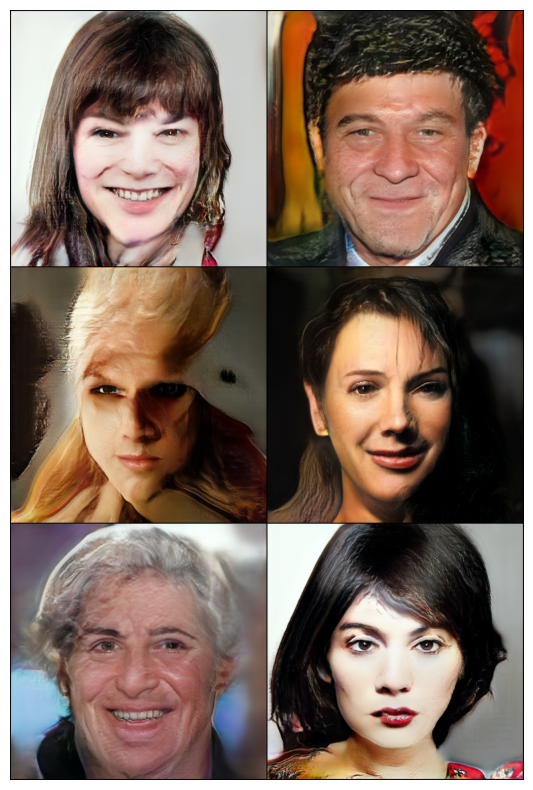

In [25]:
grid = make_grid(
    generated_faces.clamp(min=-1, max=1),
    nrow=2,
    scale_each=True,
    normalize=True
    )
plt.figure(figsize=(10,10))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
plt.axis('off');